0.5 0.001 49
---------------------------------------------------------------------------------------------------------------------------------------
0.5 0.01 49
---------------------------------------------------------------------------------------------------------------------------------------


/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/timothe_dandoy/.conda/envs/SLiM_Project/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.5 0.1 0
---------------------------------------------------------------------------------------------------------------------------------------
0.5 1.0 0
---------------------------------------------------------------------------------------------------------------------------------------
0.2 0.001 49
---------------------------------------------------------------------------------------------------------------------------------------
0.2 0.01 49
---------------------------------------------------------------------------------------------------------------------------------------
0.2 0.1 0
---------------------------------------------------------------------------------------------------------------------------------------
0.2 1.0 0
---------------------------------------------------------------------------------------------------------------------------------------
0.1 0.001 49
----------------------------------------------------------------------------------------------------------

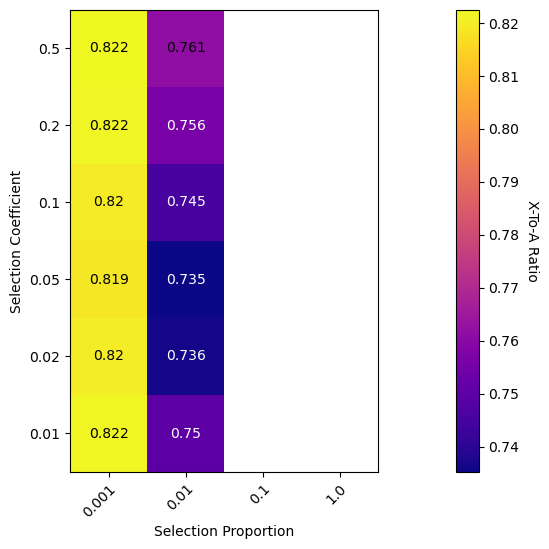


PiX *1e4


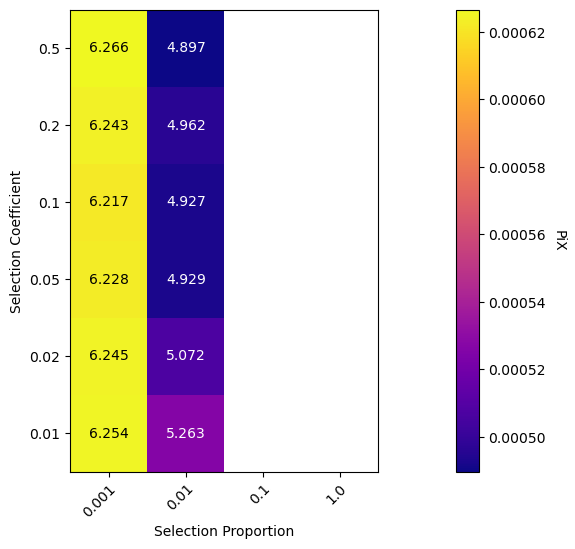


PiA  *1e4


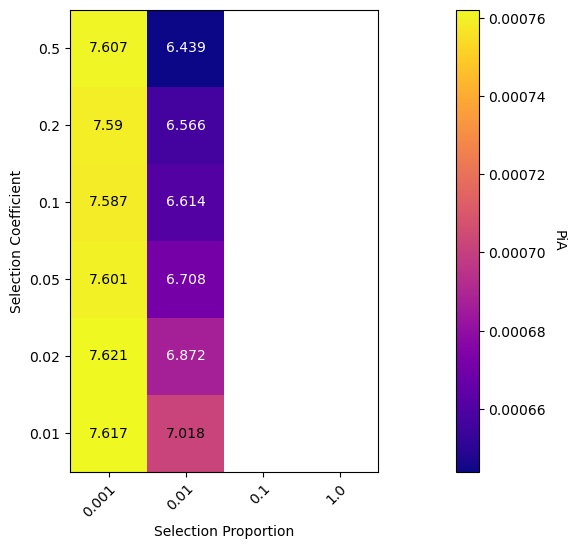

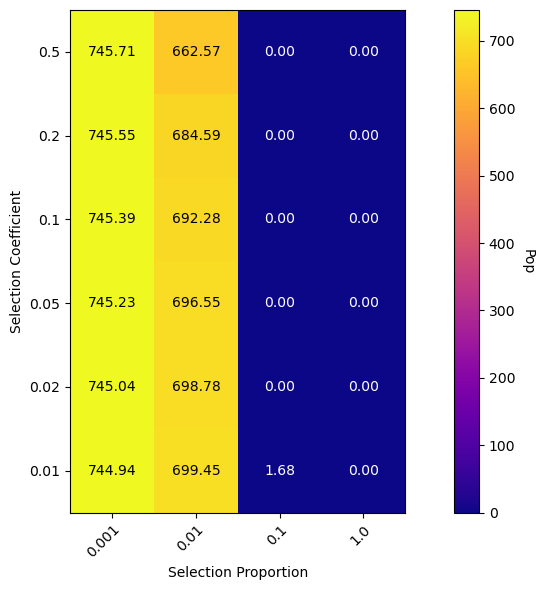

In [9]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Selection/NWFLT_MutonX_Gamma/"

#FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Pi_WF_NWFLT/"

#Selection_coeff = [0.01,0.02,0.05,0.1,0.2,0.5]
Selection_coeff = [0.5,0.2,0.1,0.05,0.02,0.01]
Selection_prop = [0.001,0.01,0.1,1.0]

HeatMap_ratio = np.zeros((len(Selection_coeff),len(Selection_prop)))
HeatMap_PiX = np.zeros((len(Selection_coeff),len(Selection_prop)))
HeatMap_PiA = np.zeros((len(Selection_coeff),len(Selection_prop)))
HeatMap_Pop = np.zeros((len(Selection_coeff),len(Selection_prop)))

for i in range(len(Selection_coeff)):
    scoeff = Selection_coeff[i]
    for j in range(len(Selection_prop)):
        sprop = Selection_prop[j]
        Pi_ratio = []
        PiX = []
        PiA = []
        Pop = []
        for NUM in range(1,501):
            File = f"{FOLDER}NWFLT_Mut_OnX{scoeff},{sprop},{NUM}.txt"
            if os.path.isfile(File):
                Text = open(File, 'r')
                Values = Text.read().split()
                if len(Values) > 0:
                    Pi_ratio.append(float(Values[1])/float(Values[0]))
                    PiX.append(float(Values[1]))
                    PiA.append(float(Values[0]))
                Text.close()

            File = f"{FOLDER}NWFLT_Mut_OnX_Pop{scoeff},{sprop},{NUM}.txt"
            if os.path.isfile(File):
                Text = open(File, 'r')
                Values = Text.read().split()
                Pop_Tick = 0
                for val in Values :
                    Pop_Tick += float(val)
                Pop.append(Pop_Tick / len(Values))
                Text.close()
        
        HeatMap_ratio[i,j] = np.median(Pi_ratio)
        HeatMap_PiX[i,j] = np.median(PiX)
        HeatMap_PiA[i,j] = np.median(PiA)
        HeatMap_Pop[i,j] = np.median(Pop)

        #print (scoeff,sprop, len(Pi_ratio))
        #print("---------------------------------------------------------------------------------------------------------------------------------------")

print("X-To-A Ratio")
fig, ax = mp.subplots(figsize=(20, 6))
im = ax.imshow(HeatMap_ratio,"plasma")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("X-To-A Ratio", rotation=-90, va="bottom")
ax.set_xticks(range(len(Selection_prop)), labels=Selection_prop,rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(Selection_coeff)), labels=Selection_coeff)
ax.set_xlabel("Selection Proportion")
ax.set_ylabel("Selection Coefficient")

for i in range(len(Selection_coeff)):
    for j in range(len(Selection_prop)):
        if HeatMap_ratio[i, j] > 0.76:
            text = ax.text(j, i, round(HeatMap_ratio[i, j],3),
                       ha="center", va="center", color="black")
        else:
            text = ax.text(j, i, round(HeatMap_ratio[i, j],3),
                       ha="center", va="center", color="w")
mp.show()

print()
print("PiX *1e4")
fig, ax = mp.subplots(figsize=(20, 6))
im = ax.imshow(HeatMap_PiX,"plasma")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("PiX", rotation=-90, va="bottom")
ax.set_xticks(range(len(Selection_prop)), labels=Selection_prop,rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(Selection_coeff)), labels=Selection_coeff)
ax.set_xlabel("Selection Proportion")
ax.set_ylabel("Selection Coefficient")

for i in range(len(Selection_coeff)):
    for j in range(len(Selection_prop)):
        if HeatMap_PiX[i, j] > 0.00054:
            text = ax.text(j, i, round( 10**4*HeatMap_PiX[i, j],3),
                       ha="center", va="center", color="black")
        else:
            text = ax.text(j, i, round( 10**4*HeatMap_PiX[i, j],3),
                       ha="center", va="center", color="w")
mp.show()

print()
print("PiA  *1e4")
fig, ax = mp.subplots(figsize=(20, 6))
im = ax.imshow(HeatMap_PiA,"plasma")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("PiA", rotation=-90, va="bottom")
ax.set_xticks(range(len(Selection_prop)), labels=Selection_prop,rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(Selection_coeff)), labels=Selection_coeff)
ax.set_xlabel("Selection Proportion")
ax.set_ylabel("Selection Coefficient")

for i in range(len(Selection_coeff)):
    for j in range(len(Selection_prop)):
        if HeatMap_PiA[i, j] > 0.0007:
            text = ax.text(j, i, round( 10**4*HeatMap_PiA[i, j],3),
                       ha="center", va="center", color="black")
        else:
            text = ax.text(j, i, round( 10**4*HeatMap_PiA[i, j],3),
                       ha="center", va="center", color="w")
mp.show()


print()

fig, ax = mp.subplots(figsize=(10, 6))

im = ax.imshow(HeatMap_Pop, cmap='plasma', origin='upper')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Pop', rotation=-90, va='bottom')

ax.set_xticks(range(len(Selection_prop)))
ax.set_xticklabels(Selection_prop, rotation=45, ha='right', rotation_mode='anchor')

ax.set_yticks(range(len(Selection_coeff)))
ax.set_yticklabels(Selection_coeff)

ax.set_xlabel('Selection Proportion')
ax.set_ylabel('Selection Coefficient')

# Annotation des valeurs
for i in range(HeatMap_Pop.shape[0]):
    for j in range(HeatMap_Pop.shape[1]):
        val = HeatMap_Pop[i, j]
        color = 'black' if val > HeatMap_Pop.max() / 2 else 'white'
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color=color)

mp.tight_layout()
mp.show()



0.01 49
---------------------------------------------------------------------------------------------------------------------------------------
0.02 49
---------------------------------------------------------------------------------------------------------------------------------------
0.05 49
---------------------------------------------------------------------------------------------------------------------------------------
0.1 49
---------------------------------------------------------------------------------------------------------------------------------------
0.2 49
---------------------------------------------------------------------------------------------------------------------------------------
0.5 49
---------------------------------------------------------------------------------------------------------------------------------------


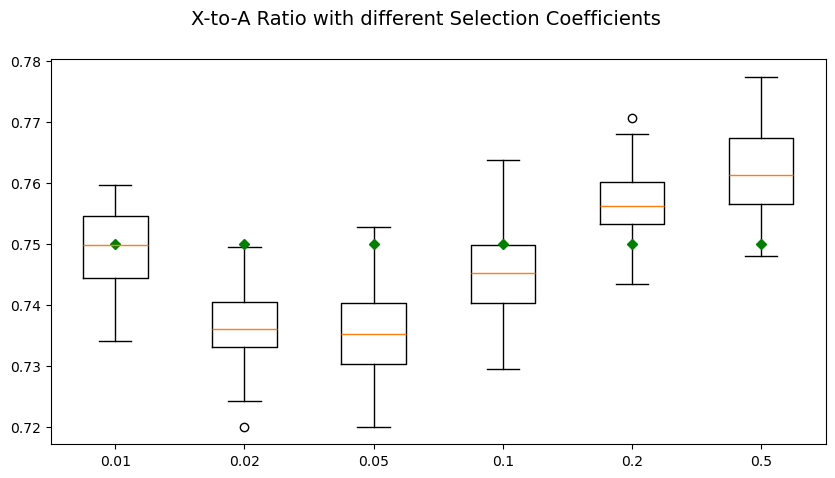

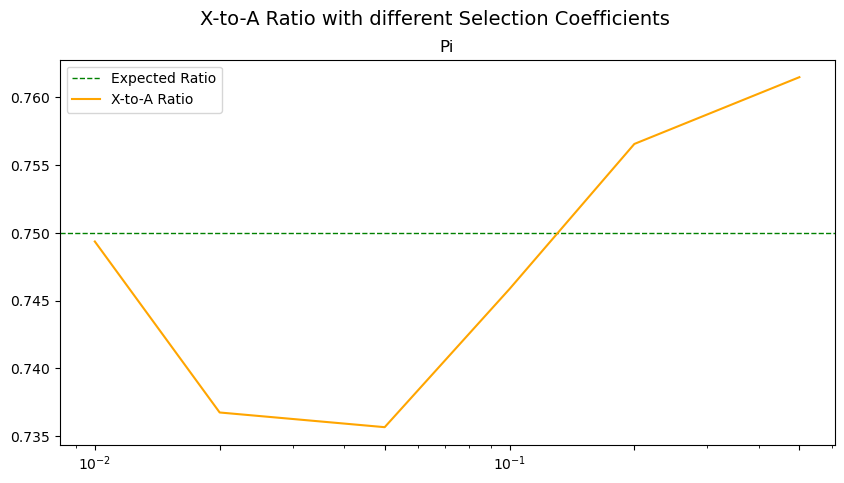

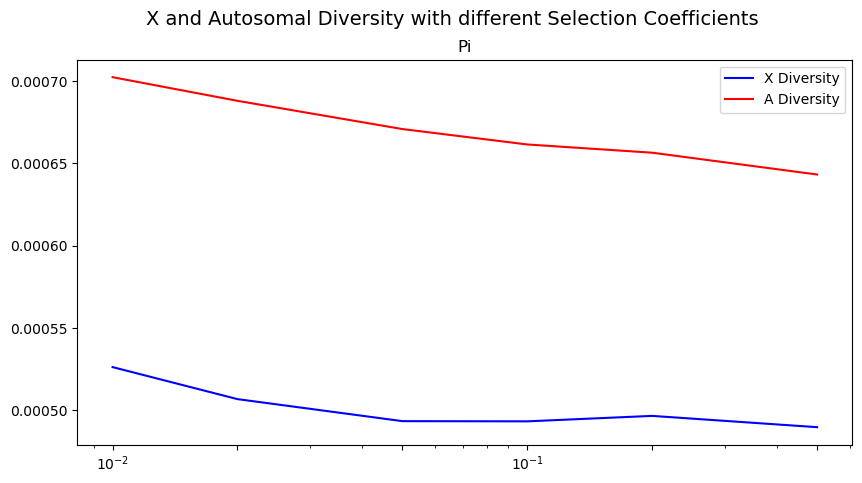

In [8]:
# Wright Fisher model
import matplotlib.pyplot as mp
import numpy as np
import os 

FOLDER = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/tmp/NWF_LifeTable/Selection/NWFLT_MutonX_Gamma/"

#FOLDER_output = "/mnt/primevo/work/timothe_dandoy/SLiM_Project/done/NWF_LifeTable/Pi_WF_NWFLT/"

Selection_coeff = [0.01,0.02,0.05,0.1,0.2,0.5]
#Selection_coeff = [0.5,0.2,0.1,0.05,0.02,0.01]
Selection_prop = [0.001,0.01,0.1,1.0]
LRatio = [0 for i in range (len(Selection_coeff))]
LX = [0 for i in range (len(Selection_coeff))]
LA = [0 for i in range (len(Selection_coeff))]
LRatio_mean = [0 for i in range (len(Selection_coeff))]
LX_mean = [0 for i in range (len(Selection_coeff))]
LA_mean = [0 for i in range (len(Selection_coeff))]

for i in range(len(Selection_coeff)):
    scoeff = Selection_coeff[i]
    sprop = 0.01
    Pi_ratio = []
    PiX = []
    PiA = []
    for NUM in range(1,501):
        File = f"{FOLDER}NWFLT_Mut_OnX{scoeff},{sprop},{NUM}.txt"
        if os.path.isfile(File):
            Text = open(File, 'r')
            Values = Text.read().split()
            if len(Values) > 0:
                Pi_ratio.append(float(Values[1])/float(Values[0]))
                PiX.append(float(Values[1]))
                PiA.append(float(Values[0]))
        Text.close()
    LRatio[i] = Pi_ratio
    LX[i] = PiX
    LA[i] = PiA

    LRatio_mean[i] = np.mean(Pi_ratio)
    LX_mean[i] = np.mean(PiX)
    LA_mean[i] = np.mean(PiA)


    
fig, ax = mp.subplots(figsize=(10, 5))
fig.subplots_adjust(wspace=0.6)
fig.suptitle(f"X-to-A Ratio with different Selection Coefficients", fontsize=14)
    
ax.boxplot(LRatio,tick_labels=Selection_coeff)
#ax.set_title("X-to-A Ratio")
#ax.set_ylim([0.6, 1])
for i in range(len(Selection_coeff)):
    ax.plot(i+1,0.75, marker='D', color='green', markersize=5)
#ax.legend()
mp.show()

fig, ax = mp.subplots(figsize=(10, 5))
fig.subplots_adjust(wspace=0.6)
fig.suptitle(f"X-to-A Ratio with different Selection Coefficients", fontsize=14)

ax.axhline(y=0.75, color='green', linestyle='--',linewidth=1, label='Expected Ratio')
ax.plot(Selection_coeff,LRatio_mean,label="X-to-A Ratio",color = "Orange")
ax.set_title("Pi")
ax.set_xscale('log') 
#ax.set_ylim([0.6, 1])
ax.set_xticks(Selection_coeff)
ax.legend()
mp.show()
    
fig, ax = mp.subplots(figsize=(10, 5))
fig.subplots_adjust(wspace=0.6)
fig.suptitle(f"X and Autosomal Diversity with different Selection Coefficients", fontsize=14)
    
ax.plot(Selection_coeff,LX_mean,label="X Diversity",color = "blue")
ax.plot(Selection_coeff,LA_mean,label="A Diversity",color = "red")
ax.set_title("Pi")
ax.set_xscale('log') 
#ax.set_ylim([0.6, 1])
ax.set_xticks(Selection_coeff)
ax.legend()
mp.show()
